In [1]:
import pandas as pd
sales_df=pd.read_excel("C:/Users/Elzac D Souza/Documents/abbads-7-sample-data(20240218_093501).xlsx")#data loading 
pd.set_option('display.max_columns',None)
print(sales_df.head(n=10))
sales_df.info()
#Calculate the total sales for each product based on available stock and prices.

sales_df['TotalSales']=sales_df['Sales']*sales_df['Quantity']
print(sales_df['TotalSales'])


# 6.

#  Scenario 3: Discount Management

#  Tasks
# 7. Identifying Discounted Products: Identify products that have discounted prices compared to their original prices.

# # 8. Discount Impact Analysis: Analyze the impact of discounts on customer purchases and total revenue.groupby
 
# 9. Setting Discount Strategies: Propose discount strategies for specific products to boost sales.



#  Scenario 4: Seller Performance Analysis

#  Tasks
# 10. Top-Selling Products by Seller: Identify the top-selling products for each seller.
# 11. Analyzing Seller Ratings: Analyze the distribution of seller ratings and identify top-rated sellers.
# 12. Seller Collaboration Opportunities: Identify potential collaborations between top-rated sellers and popular products.



#  Scenario 5: Time-Based Analysis

#  Tasks
# 13. Date Conversion: Convert the 'ReleaseDate' to datetime for time-based analysis.
# 14. Monthly Sales Trends: Analyze monthly sales trends to identify any patterns or seasonality.
# 15. New Product Introduction Strategy: Propose a strategy for introducing new products based on historical release dates.



#  Scenario 6: Customer Behavior Analysis

#  Tasks
# 16. Filtering High-Rated Products: Filter products based on high customer ratings (e.g., ratings above 4.5).
# 17. Analyzing Customer Purchasing Habits: Analyze customer purchasing habits, considering high-rated and discounted products.



#  Scenario 7: Additional Data Integration

#  Tasks
# 18. Merging with Customer Demographics: Merge the e-commerce dataset with additional data, such as customer demographics.
# 19. Analyzing Customer Segmentation: Analyze customer segments based on demographics and purchasing behavior.



#  Scenario 8: Advanced Data Transformations

#  Tasks
# 20. Scaling Prices: Apply advanced data transformations, such as logarithmic scaling on prices.
# 21. Product Profitability Analysis: Analyze the profitability of each product based on the scaled prices.



#  Scenario 9: Data Sampling and Export

#  Tasks
# 24. Random Data Sampling: Randomly sample a subset of data for testing or exploratory analysis.
# 25. Exporting Cleaned Data: Export the cleaned and analyzed data to a new CSV file for further analysis.



#  Scenario 10: Custom Analysis

#  Tasks
# 26. Performing Custom Analysis: Conduct a custom analysis based on specific business requirements or questions.


     Order ID Order Date  Ship Date  Aging    Ship Mode    Product Category  \
0   AU-2015-1 2015-11-09 2015-11-17      8  First Class  Auto & Accessories   
1   AU-2015-2 2015-06-30 2015-07-02      2  First Class  Auto & Accessories   
2   AU-2015-3 2015-12-05 2015-12-13      8  First Class  Auto & Accessories   
3   AU-2015-4 2015-05-09 2015-05-16      7  First Class  Auto & Accessories   
4   AU-2015-5 2015-07-09 2015-07-18      9  First Class  Auto & Accessories   
5   AU-2015-6 2015-02-25 2015-03-05      8  First Class  Auto & Accessories   
6   AU-2015-7 2015-04-09 2015-04-10      1  First Class  Auto & Accessories   
7   AU-2015-8 2015-03-30 2015-04-06      7  First Class  Auto & Accessories   
8   AU-2015-9 2015-02-09 2015-02-16      7  First Class  Auto & Accessories   
9  AU-2015-10 2015-04-21 2015-05-01     10  First Class  Auto & Accessories   

                  Product  Sales  Quantity  Discount  Profit  Shipping Cost  \
0       Car Media Players    140         2      0.0

,Sales,Profit
Discount,,
0.01,1605787,822596.806667
0.02,1605233,791113.160000
0.03,1634792,764883.233333
0.04,1596007,700431.716667
0.05,1581562,650878.033333


KeyError: "Columns not found: 'sales'"

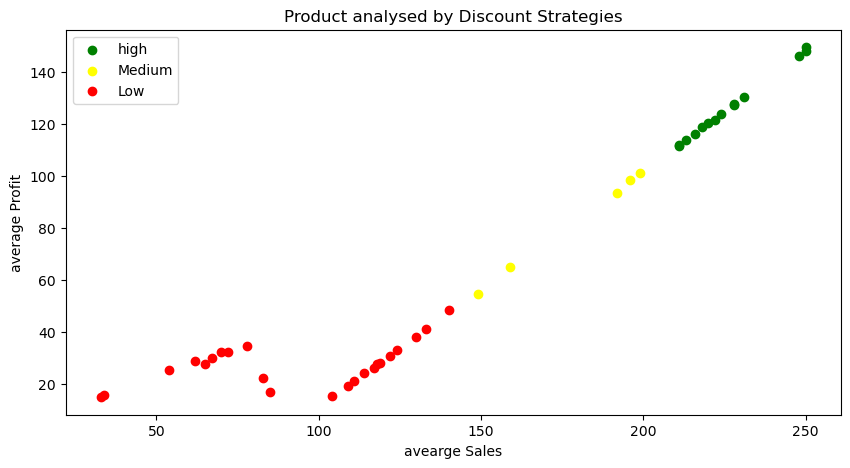

In [19]:
#Setting Discount Strategies: Propose discount strategies for specific products to boost sales.
import matplotlib.pyplot as plt

#average sales anfd profit 
product_performance=sales_df.groupby('Product')[['Sales','Profit']].mean()
product_performance
def categorize_strategy(row):
    if row['Sales']>200 and row['Profit']>100:
        return 'High Performing'
    elif row['Sales']>100 and row['Profit']>50:
        return 'Medium Performing'
    else:
        return 'Low Performing'

product_performance['Discount Strategy']= product_performance.apply(categorize_strategy,axis=1)
product_performance
plt.figure(figsize=(10,5))
high_Performing_Products= product_performance[product_performance['Discount Strategy']== 'High Performing']
plt.scatter(x= high_Performing_Products['Sales'],y=high_Performing_Products['Profit'],color='green',label= "high")

medium_Performing_Products= product_performance[product_performance['Discount Strategy']== 'Medium Performing']
plt.scatter(x= medium_Performing_Products['Sales'],y=medium_Performing_Products['Profit'],color='yellow',label= "Medium")
Low_Performing_Products= product_performance[product_performance['Discount Strategy']== 'Low Performing']
plt.scatter(x= Low_Performing_Products['Sales'],y=Low_Performing_Products['Profit'],color='red',label= "Low")
plt.title('Product analysed by Discount Strategies')
plt.xlabel('avearge Sales')
plt.ylabel('average Profit')
plt.legend()
plt.show()
           

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Task: Top-Selling Products by Seller

# Identify top-selling products for each seller
top_selling_products = sales_df.groupby(['Seller', 'Product'])['Quantity'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Quantity', ascending=False).groupby('Seller').head(1)

# Visualize the top-selling products
plt.figure(figsize=(12, 6))
plt.bar(top_selling_products['Seller'], top_selling_products['Quantity'], color='skyblue')
plt.title('Top-Selling Products by Seller')
plt.xlabel('Seller')
plt.ylabel('Quantity Sold')
plt.show()


KeyError: 'Seller'

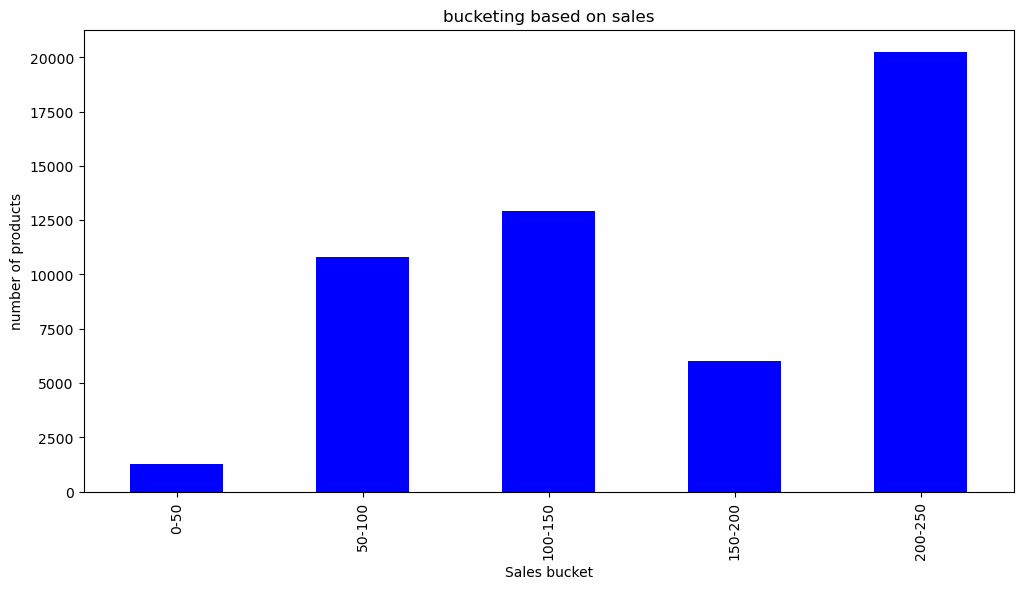

In [27]:
#bUCKETING BASED ON SALES 
sales_bins =[0,50,100,150,200,float('inf')]
sales_labels =['0-50','50-100','100-150','150-200','200-250']
sales_df['sales bucket']=pd.cut(sales_df['Sales'],bins=[0,50,100,150,200,float('inf')],labels=sales_labels,right=False)
sales_distribution= sales_df['sales bucket'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sales_distribution.plot(kind='bar',color='blue')
plt.title('bucketing based on sales')
plt.xlabel('Sales bucket')
plt.ylabel('number of products')
plt.show()
